---
title: Simple Linear Regression for Time Series
---

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We shall fit simple linear regression models to the Consumer Price Index (CPI) Data (downloaded from https://fred.stlouisfed.org/series/CPIAUCSL). Changes in the CPI are used to measure Inflation. 

In [51]:
## Inflation (Consumer Price Index)
cpi = pd.read_csv('CPIAUCSL_01September2025.csv')
print(cpi)

    observation_date  CPIAUCSL
0         1947-01-01    21.480
1         1947-02-01    21.620
2         1947-03-01    22.000
3         1947-04-01    22.000
4         1947-05-01    21.950
..               ...       ...
938       2025-03-01   319.615
939       2025-04-01   320.321
940       2025-05-01   320.580
941       2025-06-01   321.500
942       2025-07-01   322.132

[943 rows x 2 columns]


In [52]:
cpi['observation_date'] = pd.to_datetime(cpi['observation_date'])
cpi.set_index('observation_date', inplace = True)
print(cpi)

                  CPIAUCSL
observation_date          
1947-01-01          21.480
1947-02-01          21.620
1947-03-01          22.000
1947-04-01          22.000
1947-05-01          21.950
...                    ...
2025-03-01         319.615
2025-04-01         320.321
2025-05-01         320.580
2025-06-01         321.500
2025-07-01         322.132

[943 rows x 1 columns]


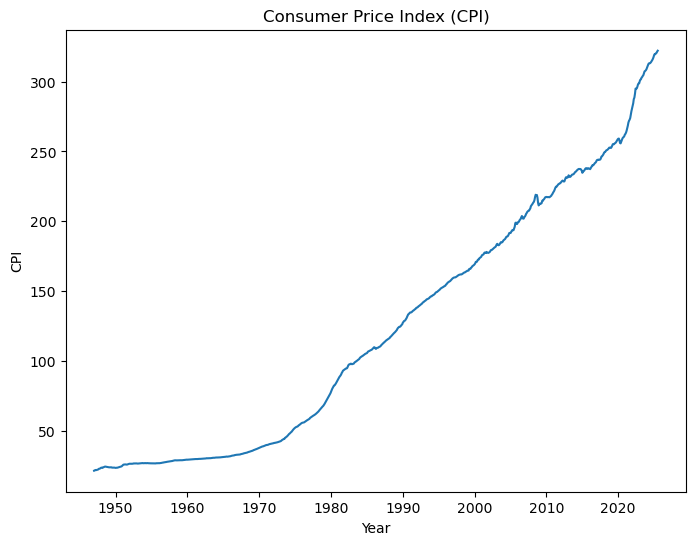

In [55]:
plt.figure(figsize=(8,6))
plt.plot(cpi.index, cpi['CPIAUCSL'], label='CPI')
plt.xlabel('Year')
plt.ylabel('CPI')
plt.title('Consumer Price Index (CPI)')
plt.show()

### CPI Regression with Time as Covariate

We will fit a linear regression model to the CPI data, with time as the covariate. The simplest model is: 
\begin{equation*}
  y_i = \beta_0 + \beta_1 x_i + \epsilon_i
\end{equation*}
where $y_i$ denotes the CPI for time index $i$, and $x_i = i$. The interpretation of $\beta_1$ is that it represents the numerical change in CPI for one month to the next. This is not a good model for CPI, because the relationship between CPI and data does not appear to be linear. Also CPI increases are usually reported in percentages (e.g., inflation is now at 2.8% etc.), and not in raw numerical increase. A better linear regression model here would use $y_i$ as the **logarithm** of CPI for time index $i$: 
\begin{equation*}
  y_i = \log(\text{CPI}_i) = \beta_0 + \beta_1 x_i + \epsilon_i
\end{equation*}
where $x_i = i$ as before. Now the interpretation of $\beta_1$ is that it represents the numerical change in $\log \text{CPI}_i$ for one month to the next. Note that
\begin{equation*}
   \log \text{CPI}_i - \log \text{CPI}_{i-1} = \log \frac{\text{CPI}_i}{\text{CPI}_{i-1}} \approx \frac{\text{CPI}_i}{\text{CPI}_{i-1}}  - 1 = \frac{\text{CPI}_i - \text{CPI}_{i-1}}{\text{CPI}_{i-1}} 
\end{equation*}
In other words, $100 \times \beta_1$ represents the **percent change** in CPI from one month to the next. If we want the percent change for one year (as opposed to one month), we can look at $12 \times 100 \times \beta_1$. This number can be taken to represent an estimate of the historical inflation rate. 

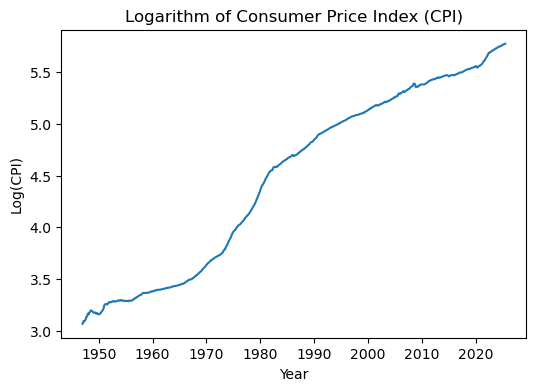

In [58]:
plt.figure(figsize=(6,4))
plt.plot(cpi.index, np.log(cpi['CPIAUCSL']), label='Logarithm of CPI')
plt.xlabel('Year')
plt.ylabel('Log(CPI)')
plt.title('Logarithm of Consumer Price Index (CPI)')
plt.show()

The process of using the observed data to obtain estimates of the unknown parameters (in this case $\beta_0$ and $\beta_1$) is known as ** Model Fitting **. For the linear regression model, model fitting will be done using the OLS function from the statsmodels library. 

In [ ]:
import statsmodels.api as sm

We need to input the observed response values $y_1, \dots, y_n$ as well as the covariate values $x_1, \dots, x_n$ (remember that we are using $x_i = i$). 

In [59]:
yvec = np.log(np.array(cpi['CPIAUCSL']))
n = cpi.shape[0]
xvec = np.arange(1, n+1)
linreg = sm.OLS(yvec, xvec).fit()
print(linreg.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              7771.
Date:                Tue, 02 Sep 2025   Prob (F-statistic):                        0.00
Time:                        16:08:51   Log-Likelihood:                         -1720.7
No. Observations:                 943   AIC:                                      3443.
Df Residuals:                     942   BIC:                                      3448.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In the context of the linear regression model, the parameters $\beta_0$ and $\beta_1$ are also known as the coefficients. The table in the output above reports only one coefficient value. Actually the function sm.OLS(yvec, xvec).fit() is not fitting our intended model $y_i = \beta_0 + \beta_1 x_i + \epsilon_i$ but it is fitting instead $y_i = \beta_1 x_i + \epsilon_i$ (i.e., it is not using $\beta_0$). To enable $\beta_0$, we need to do the following: 

In [60]:
X = sm.add_constant(xvec)
linreg2 = sm.OLS(yvec, X).fit()
print(linreg2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 2.695e+04
Date:                Tue, 02 Sep 2025   Prob (F-statistic):               0.00
Time:                        16:10:36   Log-Likelihood:                 385.22
No. Observations:                 943   AIC:                            -766.4
Df Residuals:                     941   BIC:                            -756.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9859      0.010    284.536      0.0

From this table, we see that the estimate of $\beta_0$ is 2.9859 and the estimate of $\beta_1$ is 0.0032. As per our interpretation, the month-to-month inflation rate is $100 \times \beta_1$ which is $0.32 \%$. If we want the annual inflation rate, we would have to multiply this by 12 which gives:

In [61]:
historical_inflation_rate = 12 * 100 * linreg2.params[1]
print(f'Historical annual inflation rate: {historical_inflation_rate:.3f}%')

Historical annual inflation rate: 3.794%


The regression output also gives an indication of the uncertainty associated with this inflation estimate: 

In [62]:
conf_intervals_linreg2 = linreg2.conf_int(alpha=0.05)
print(conf_intervals_linreg2)
print(f'95% confidence interval for historical annual inflation rate (Linear Regression model): [{12*100*conf_intervals_linreg2[1,0]:.3f}%, {   12*100*conf_intervals_linreg2[1,1]:.3f}%]')

[[2.96527443 3.00646247]
 [0.003124   0.00319959]]
95% confidence interval for historical annual inflation rate (Linear Regression model): [3.749%, 3.840%]


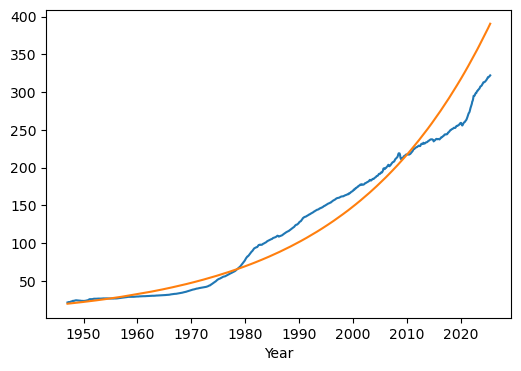

In [64]:
plt.figure(figsize=(6,4))
plt.plot(cpi.index, cpi['CPIAUCSL'], label='CPI')
plt.xlabel('Year')
plt.plot(cpi.index, np.exp(linreg2.fittedvalues))
plt.show()

From this plot, it is clear that this regression model may not do a good job in predicting the values of CPI for the next few months. 

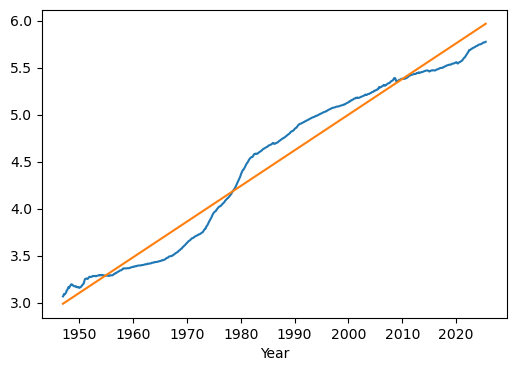

In [65]:
plt.figure(figsize=(6,4))
plt.plot(cpi.index, np.log(cpi['CPIAUCSL']), label='Logarithm of CPI')
plt.xlabel('Year')
plt.plot(cpi.index, linreg2.fittedvalues)
plt.show()

### Lagged Regression for CPI

Next let us look at lagged regression, where the covariate is chosen to be $x_i = y_{i-1}$ (i.e., the covariate value for time index i equals the response value for the previous time index). 

In [95]:
yreg = yvec[1:]
xreg = yvec[:-1]
Xmat = sm.add_constant(xreg)
armod = sm.OLS(yreg, Xmat).fit()
print(armod.summary())
print(armod.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.245e+07
Date:                Tue, 02 Sep 2025   Prob (F-statistic):               0.00
Time:                        21:31:13   Log-Likelihood:                 4019.3
No. Observations:                 942   AIC:                            -8035.
Df Residuals:                     940   BIC:                            -8025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0039      0.001      6.707      0.0

Note that the estimated value of $\beta$ is 0.9998 which is fairly close to 1. Because of this, this AutoRegression model can be treated as approximately trying to fit a constant to the month-to-month inflation rate, as shown below. 

The regression model corresponding to the output above is: 
\begin{equation*}
  \log \text{CPI}_t = \beta_0 + \beta_1 \log \text{CPI}_{t-1} + \epsilon_t
\end{equation*}
This fitted coefficients are $\hat{\beta}_0 = 0.0039$ and $\hat{\beta}_1 = 0.9998 \approx 1$. Thus the fitted model is approximately: 
\begin{equation*}
   \log \text{CPI}_t \approx 0.0039 + \log \text{CPI}_{t-1} + \epsilon_t,
\end{equation*}
or equivalently
\begin{equation*}
    \log \text{CPI}_t - \log \text{CPI}_{t-1} \approx 0.0039 +  \epsilon_t,
\end{equation*}
which is again the same as
\begin{equation*}
   100 \times \log \frac{\text{CPI}_t}{\text{CPI}_{t-1}} \approx 0.39 + \text{error}
\end{equation*}
So this model is giving a historical inflation rate estimate (month-to-month) of $0.39\%$ which is equivalent to a historic annual inflation rate estimate of $12 \times 0.39$: 

In [ ]:
historical_inflation_rate_armodel = 12 * 100 * armod.params[0] #armod.params[0] is the estimate of beta_0
print(f'Historical annual inflation rate (AR(1) model): {historical_inflation_rate_armodel:.3f}%')

Historical annual inflation rate (AR(1) model): 4.645%


This estimate of $4.645\%$ is somewhat higher than the estimate $3.794\%$ obtained by the previous regression (where the covariate was time). This increase is the estimate is because of the approximation 0.9998 vs 1. Note that the correct model (without the approximation 0.9998 vs 1) is: 
\begin{equation*}
    \log \text{CPI}_t - 0.9998 * \log \text{CPI}_{t-1} = 0.0039 +  \epsilon_t,
\end{equation*}
which is equivalent to
\begin{equation*}
    \log \frac{\text{CPI}_t}{\text{CPI}_{t-1}} = 0.0039 - 0.0002 * \log \text{CPI}_{t-1} +  \epsilon_t,
\end{equation*}
The variable $0.0002 * \log \text{CPI}_{t-1}$ is not exactly negligble; it has a mean of about 0.0008 (see below) which will have an effect of reducing 0.0039 by some amount. 


In [96]:
np.mean(0.0002 * yvec[:-1])

0.0008953722086746689

The uncertainty interval associated with the estimate of $\beta_0$ is given by: 

In [68]:
# 95% confidence intervals
conf_intervals = armod.conf_int(alpha=0.05)
print(conf_intervals)

[[0.00273806 0.00500324]
 [0.99952921 1.00002579]]


Multiplying the interval above for $\beta_0$ by $12 * 100$, we get an estimate of the historical inflation rate (with again the caveat that this will be slightly inflated because of the approximation $0.9998 \approx 1$)

In [69]:
#So the uncertainty interval for the estimated historical annual inflation rate is: 
print(f'95% confidence interval for historical annual inflation rate (AR(1) model): [{12*100*conf_intervals[0,0]:.3f}%, {12*100*conf_intervals[0,1]:.3f}%]')

95% confidence interval for historical annual inflation rate (AR(1) model): [3.286%, 6.004%]


Compare this interval $[3.286, 6.004] \%$ (which is much wider) with the previous one $[3.749, 3.84]\%$.

To check how well this second model (AutoRegression) fits the data, we can plot the values of $100 \times \log \frac{\text{CPI}_t}{\text{CPI}_{t-1}}$ with time: 

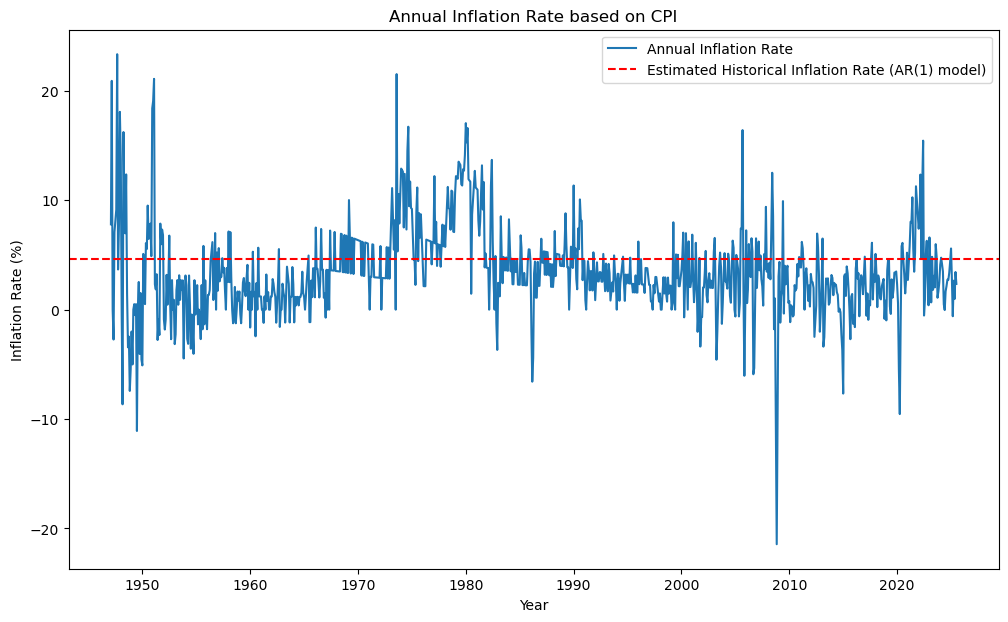

In [97]:
#Plot the values of 12 * 100 * log(CPI_t / CPI_{t-1}) with time
inflation_rates = 12 * 100 * (yvec[1:] - yvec[:-1])
dates = cpi.index[1:]   
plt.figure(figsize=(12,7))
plt.plot(dates, inflation_rates, label='Annual Inflation Rate')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.title('Annual Inflation Rate based on CPI')
plt.axhline(y=historical_inflation_rate_armodel, color='r', linestyle='--', label='Estimated Historical Inflation Rate (AR(1) model)')
plt.legend()
plt.show()

The individual inflation rates vary quite widely, so it is natural for the uncertainty interval for the inflation rate to be somewhat wide (unlike the interval that we got from the regression with time model). 

Let us plot the mean of the inflation rates. It is below the estimate that we got from the AutoRegression because of the approximation $0.9998 \approx 1$. 

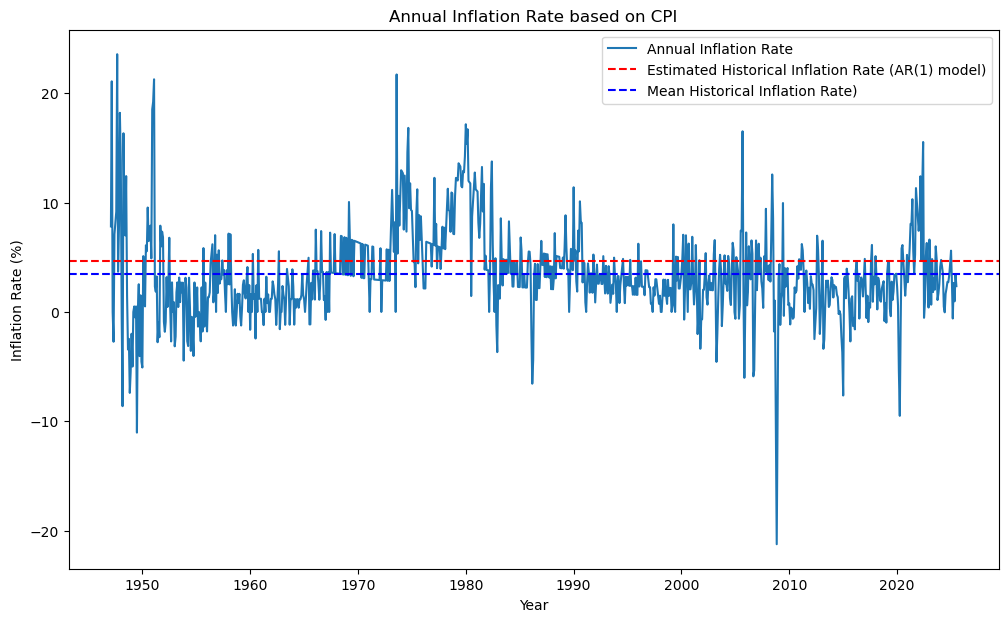

In [ ]:
#Plot the values of 12 * 100 * log(CPI_t / CPI_{t-1}) with time
inflation_rates = 12 * 100 * (np.exp(yvec[1:]) - np.exp(yvec[:-1]))/np.exp(yvec[:-1])
dates = cpi.index[1:]   
plt.figure(figsize=(12,7))
plt.plot(dates, inflation_rates, label='Annual Inflation Rate')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.title('Annual Inflation Rate based on CPI')
plt.axhline(y=historical_inflation_rate_armodel, color='r', linestyle='--', label='Estimated Historical Inflation Rate (AR(1) model)')
plt.axhline(y=np.mean(inflation_rates), color='b', linestyle='--', label='Mean Historical Inflation Rate')
plt.legend()
plt.show()

This was just an illustration of how regressions can be used for time series data. We shall study AutoRegressions in much more detail later.